### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [130]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [131]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [132]:
initial_data.shape[0] == processed_data.shape[0]

True

In [133]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [134]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [135]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [136]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

In [137]:
processed_data.head()


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


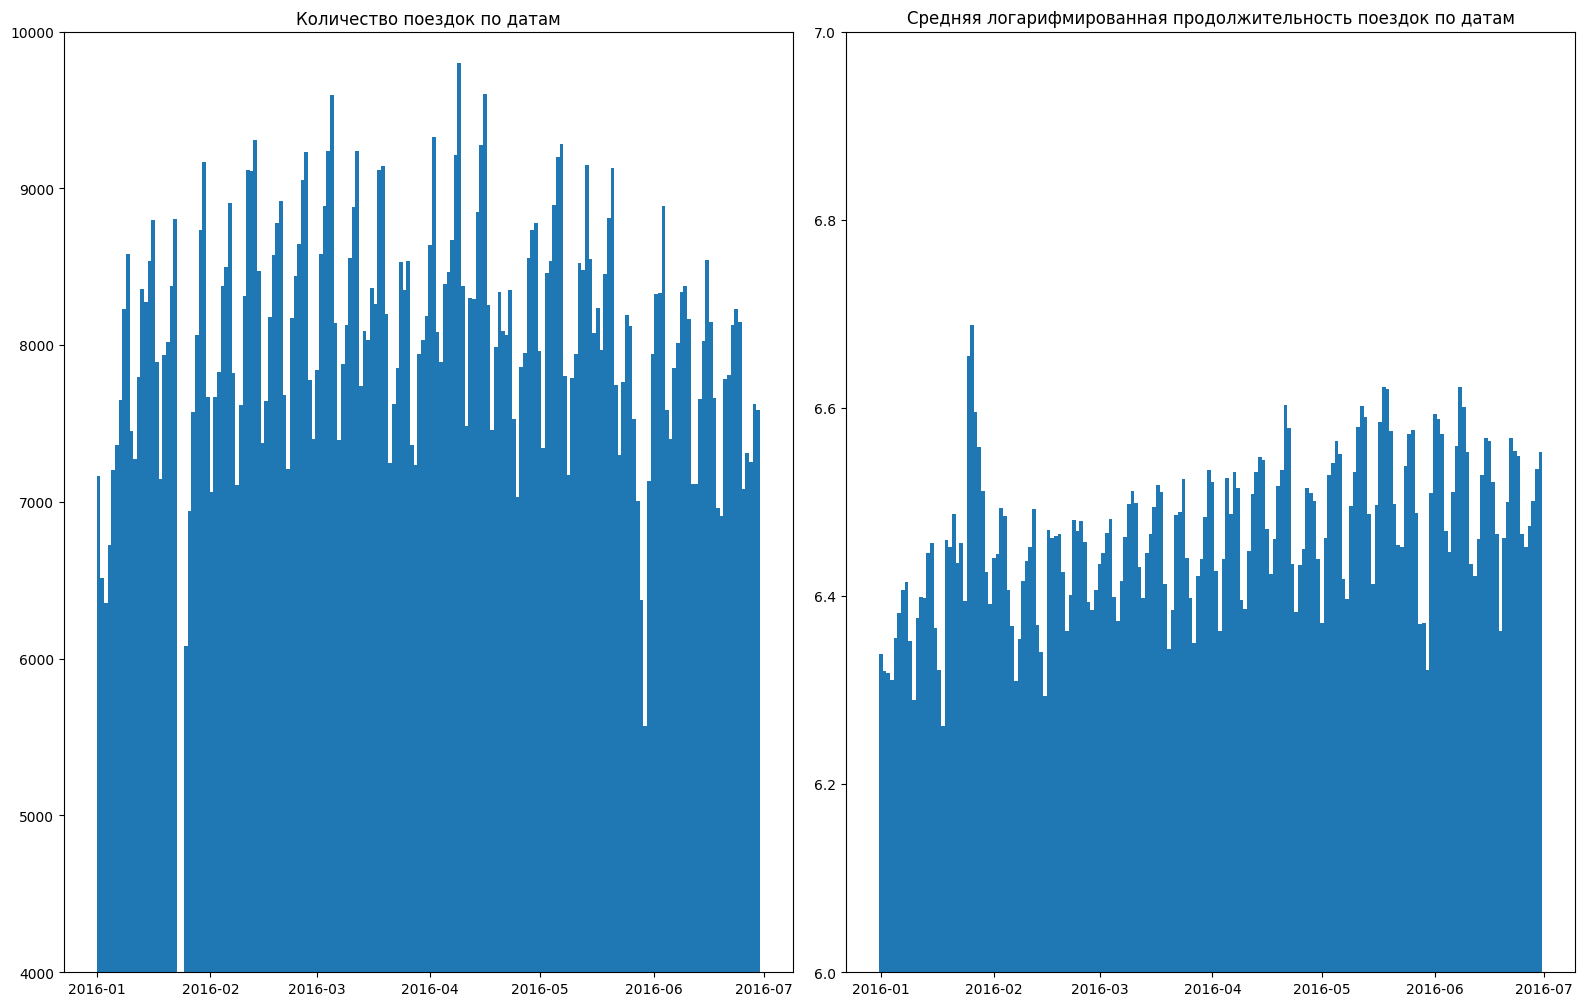

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [139]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


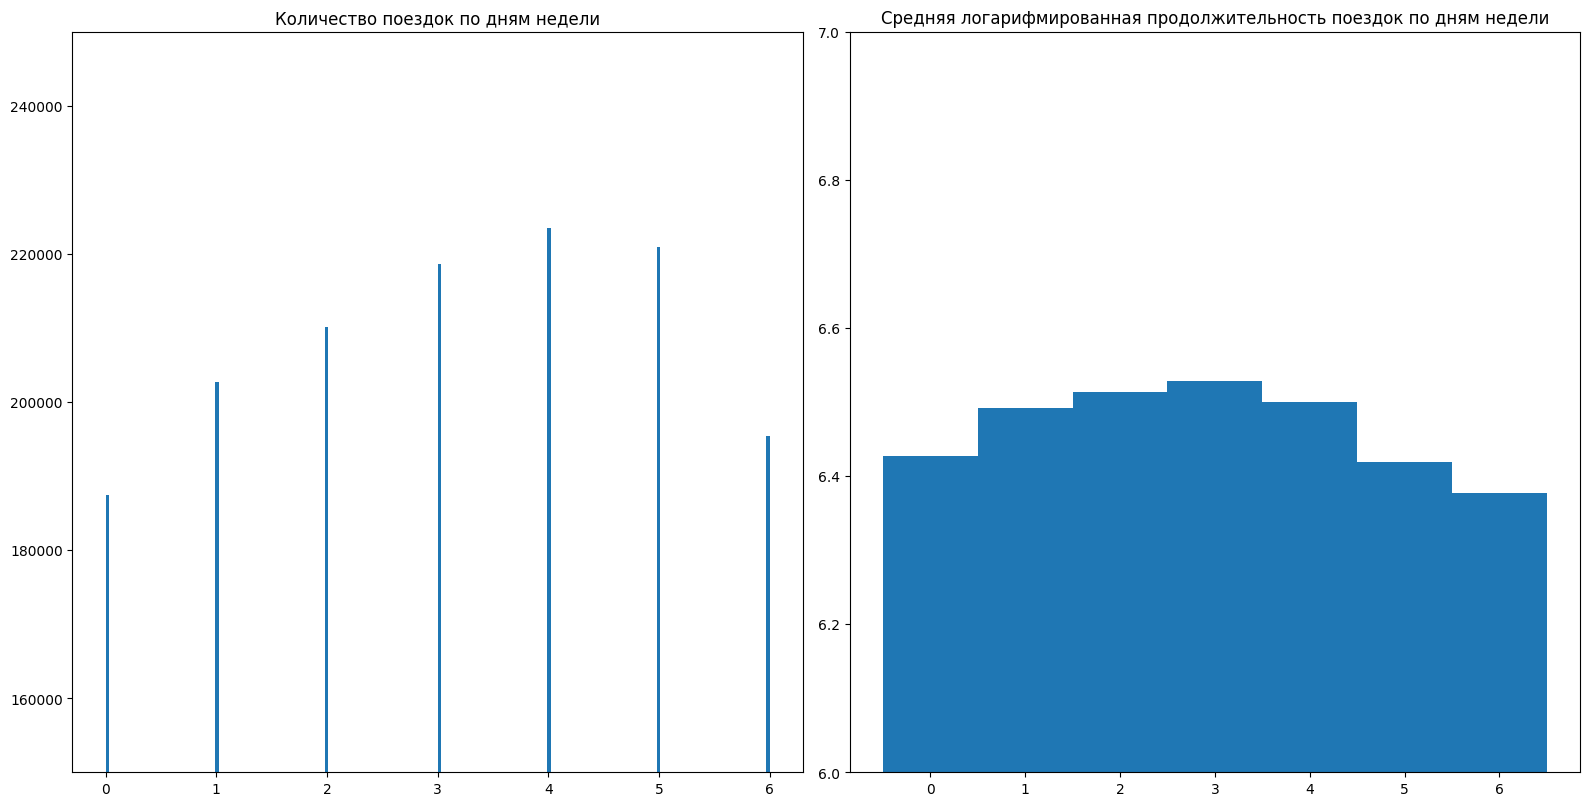

In [140]:
### Your code is here
fig = plt.figure()

fig.set_size_inches(16, 8)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.date.unique().shape[0])
plt.ylim((150000, 250000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()

In [141]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


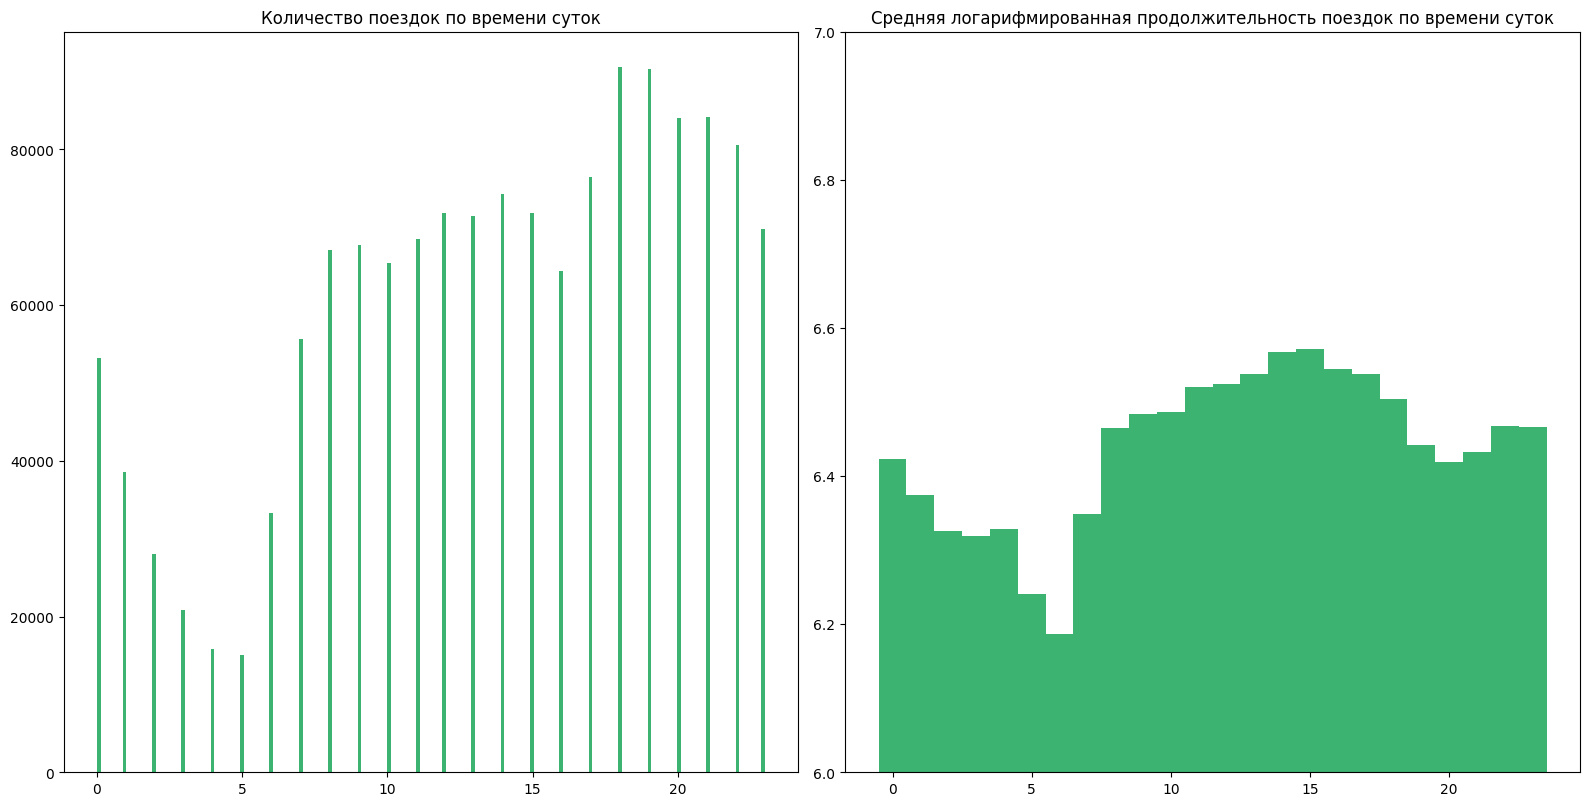

In [142]:
### Your code is here
fig = plt.figure()

fig.set_size_inches(16, 8)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.date.unique().shape[0], color = 'mediumseagreen')
# plt.ylim((150000, 250000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1,
        color = 'mediumseagreen')
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по времени суток')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()

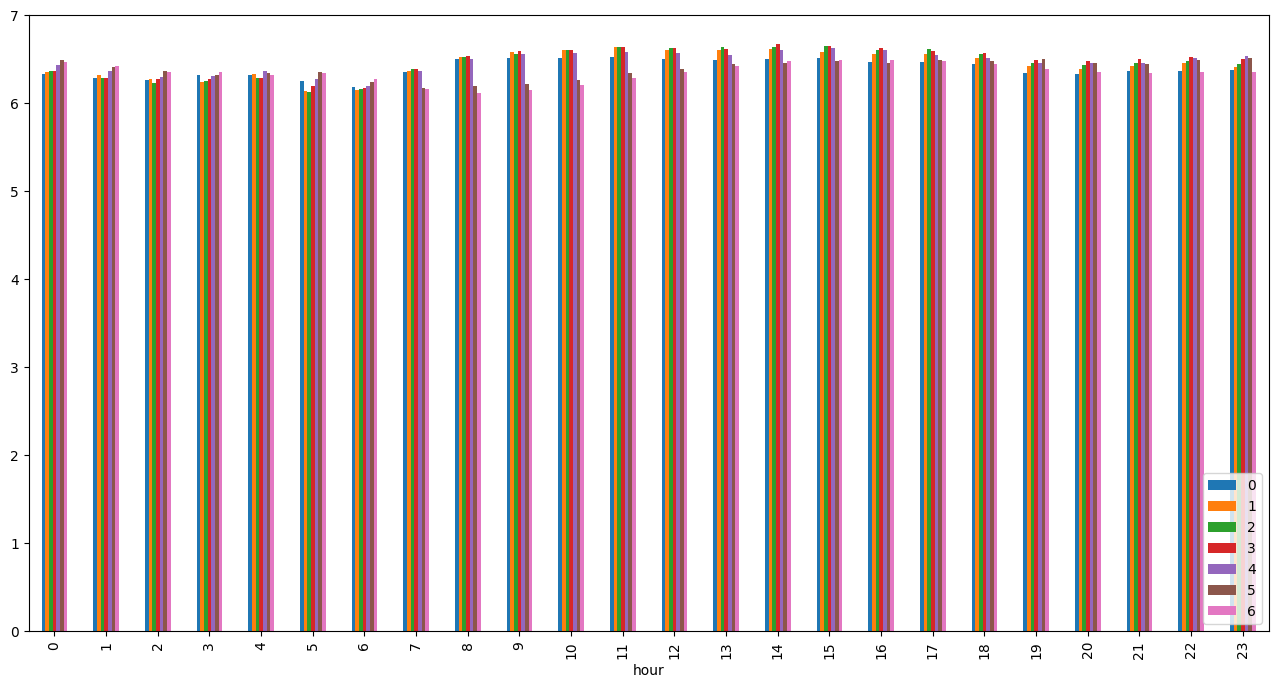

In [143]:
# Средняя продолжительность поездки vs время суток для каждого дня недели
# (например, нарисовав с разными цветами и, соответственно, легендами)

stats = processed_data.pivot_table(
    index = 'hour',
    columns = 'day_of_week',
    values = 'log_trip_duration',
    aggfunc = 'mean',
).reset_index()


stats.plot(
        x = 'hour', 
        kind = 'bar', 
        stacked = False, 
        figsize = (16, 8),
    ).legend(loc='lower right')

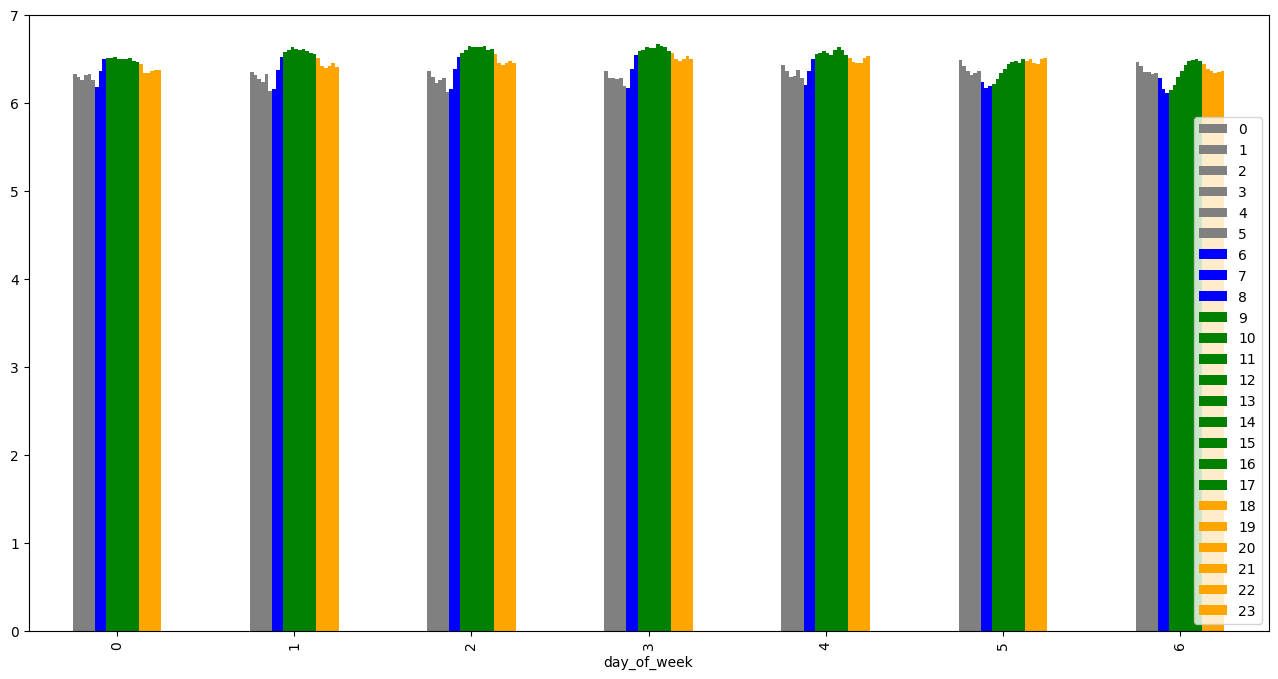

In [144]:
# Средняя продолжительность поездки vs время суток для каждого дня недели
# (например, нарисовав с разными цветами и, соответственно, легендами)

stats_2 = processed_data.pivot_table(
    # index = 'hour',
    # columns = 'day_of_week',
    index = 'day_of_week',
    columns = 'hour',

    values = 'log_trip_duration',
    aggfunc = 'mean',
).reset_index()


stats_2.plot(
        x = 'day_of_week', 
        kind = 'bar', 
        stacked = False, 
        figsize = (16, 8),
        color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey',
                 'blue', 'blue', 'blue', 'green', 'green', 'green',
                 'green', 'green', 'green', 'green', 'green', 'green', 
                 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'],
    ).legend(loc='lower right')

In [145]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [146]:
## correlation 
corr_matrix = stats_per_hour_of_day = processed_data.pivot_table(
    index = 'hour',
    values = ['date','log_trip_duration'],
    aggfunc = {
        'date': 'count',
        'log_trip_duration': 'mean',
    }
).corr()

corr_matrix

,date,log_trip_duration
date,1.00000,0.76506
log_trip_duration,0.76506,1.00000


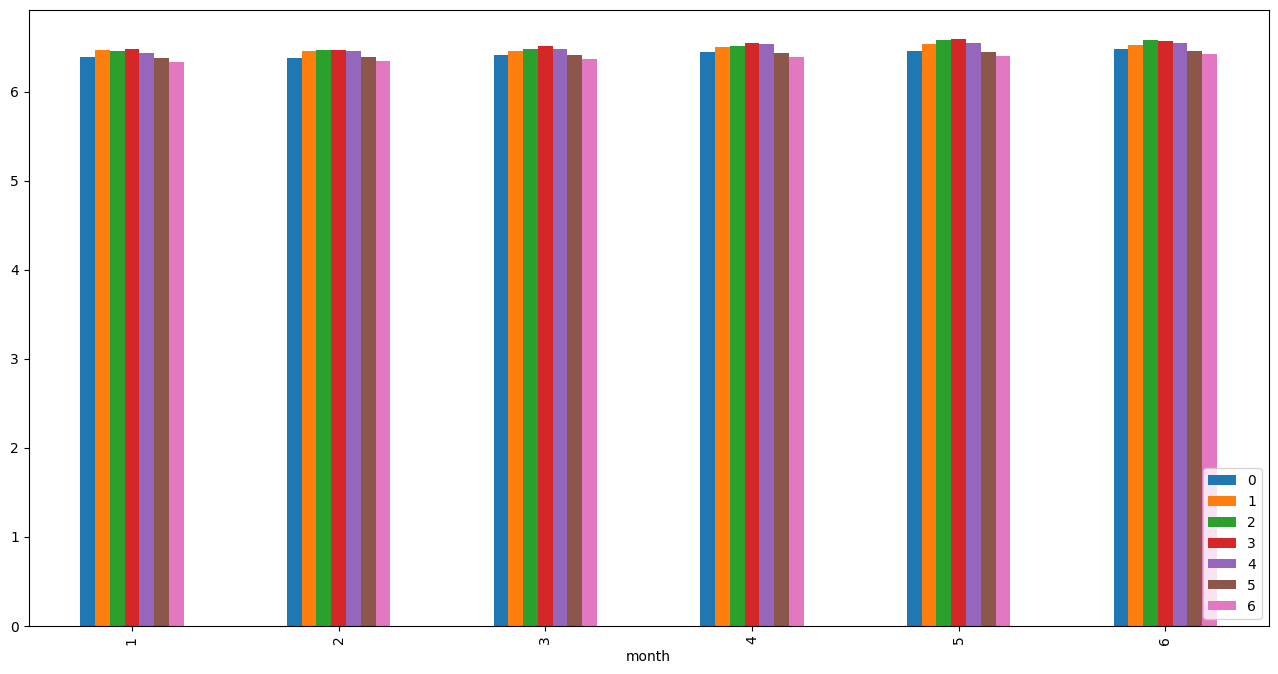

In [147]:
stats_3 = processed_data.pivot_table(
    index = 'month',
    columns = 'day_of_week',
    
    values = 'log_trip_duration',
    aggfunc = 'mean',
).reset_index()


stats_3.plot(
        x = 'month', 
        kind = 'bar', 
        stacked = False, 
        figsize = (16, 8),
        # color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey',
        #          'blue', 'blue', 'blue', 'green', 'green', 'green',
        #          'green', 'green', 'green', 'green', 'green', 'green', 
        #          'orange', 'orange', 'orange', 'orange', 'orange', 'orange'],
    ).legend(loc='lower right')

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [148]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [149]:
processed_data.info()
processed_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   passenger_count     1458644 non-null  float64       
 2   store_and_fwd_flag  1458644 non-null  int64         
 3   distance_km         1458644 non-null  float64       
 4   log_trip_duration   1458644 non-null  float64       
 5   pickup_datetime     1458644 non-null  datetime64[ns]
 6   date                1458644 non-null  object        
 7   day_of_week         1458644 non-null  int32         
 8   hour                1458644 non-null  int32         
 9   month               1458644 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(2), object(1)
memory usage: 138.0+ MB


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [150]:
### Создадим первый бинарный признак
### Your code is here

# processed_data['anomaly'] = 0
# processed_data.loc[processed_data['date'] == pd.to_datetime('2016-01-23'),'anomaly'] = 1

processed_data['anomaly'] = 0
processed_data.loc[processed_data['date'].astype(str) == '2016-01-23', 'anomaly'] = 1

processed_data['anomaly'].value_counts()

anomaly
0    1456996
1       1648
Name: count, dtype: int64

In [151]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


In [152]:
### Создадим второй бинарный признак
### Your code is here
top10_dow_hour_pairs = (
    processed_data.pivot_table(
        index = ['day_of_week','hour'],
        values = 'log_trip_duration',
        aggfunc = 'mean',
    )
    .reset_index()
    .sort_values(by = 'log_trip_duration', ascending = False)
    .head(10)
    .drop(columns = 'log_trip_duration')
    #.to_records(index=False) # convert to tuple
    # .values#.tolist()
)

top10_dow_hour_pairs['traffic_jam'] = 1

top10_dow_hour_pairs

,day_of_week,hour,traffic_jam
86,3,14,1
87,3,15,1
63,2,15,1
59,2,11,1
61,2,13,1
62,2,14,1
35,1,11,1
83,3,11,1
111,4,15,1
88,3,16,1


In [153]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


In [154]:
top10_dow_hour_pairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 86 to 88
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day_of_week  10 non-null     int32
 1   hour         10 non-null     int32
 2   traffic_jam  10 non-null     int64
dtypes: int32(2), int64(1)
memory usage: 240.0 bytes


In [155]:
processed_data = processed_data.reset_index().merge(
    top10_dow_hour_pairs, 
    on=['day_of_week', 'hour'], 
    how='left'
).fillna(0)

processed_data['traffic_jam'] = processed_data['traffic_jam'].astype(int)

# Восстанавливаем id как индекс
processed_data = processed_data.set_index('id')


In [156]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


In [157]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


In [158]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   passenger_count     1458644 non-null  float64       
 2   store_and_fwd_flag  1458644 non-null  int64         
 3   distance_km         1458644 non-null  float64       
 4   log_trip_duration   1458644 non-null  float64       
 5   pickup_datetime     1458644 non-null  datetime64[ns]
 6   date                1458644 non-null  object        
 7   day_of_week         1458644 non-null  int32         
 8   hour                1458644 non-null  int32         
 9   month               1458644 non-null  int32         
 10  anomaly             1458644 non-null  int64         
 11  traffic_jam         1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(4), object(1)
m

In [159]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [160]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [161]:
### Делаем OneHotEncoding и конкатим с processed_data

for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here
    
    ohe = pd.get_dummies(processed_data[col], prefix = col, drop_first = True, dtype = 'int64')
    # ohe = ohe.drop(columns=ohe.columns[0],axis=1)
    processed_data = pd.concat([processed_data, ohe], axis = 1)
    processed_data = processed_data.drop(columns = col)
    

In [162]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   store_and_fwd_flag  1458644 non-null  int64  
 3   distance_km         1458644 non-null  float64
 4   log_trip_duration   1458644 non-null  float64
 5   anomaly             1458644 non-null  int64  
 6   traffic_jam         1458644 non-null  int64  
 7   day_of_week_1       1458644 non-null  int64  
 8   day_of_week_2       1458644 non-null  int64  
 9   day_of_week_3       1458644 non-null  int64  
 10  day_of_week_4       1458644 non-null  int64  
 11  day_of_week_5       1458644 non-null  int64  
 12  day_of_week_6       1458644 non-null  int64  
 13  hour_1              1458644 non-null  int64  
 14  hour_2              1458644 non-null  int64  
 15  hour_3    

In [163]:
processed_data.head(5).to_csv('m06_lesson07_task04_output.csv', index = True)

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   store_and_fwd_flag  1458644 non-null  int64  
 3   distance_km         1458644 non-null  float64
 4   log_trip_duration   1458644 non-null  float64
 5   anomaly             1458644 non-null  int64  
 6   traffic_jam         1458644 non-null  int64  
 7   day_of_week_1       1458644 non-null  int64  
 8   day_of_week_2       1458644 non-null  int64  
 9   day_of_week_3       1458644 non-null  int64  
 10  day_of_week_4       1458644 non-null  int64  
 11  day_of_week_5       1458644 non-null  int64  
 12  day_of_week_6       1458644 non-null  int64  
 13  hour_1              1458644 non-null  int64  
 14  hour_2              1458644 non-null  int64  
 15  hour_3    

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [166]:
### Your code is here

corr_value = processed_data[['distance_km', 'passenger_count']].corr().iloc[0, 1]
print(f'Корреляция между distance_km и passenger_count: {corr_value:.4f}')

Корреляция между distance_km и passenger_count: 0.0166


In [167]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Определение фич и целевой переменной
X = processed_data.drop(columns=['log_trip_duration'])  # Все фичи, кроме целевой переменной
y = processed_data['log_trip_duration']  # Целевая переменная

# Инициализация модели (в данном случае линейная регрессия)
model = LinearRegression()

# Инициализация Sequential Feature Selector
sfs = SFS(model,
          k_features=5,  # Количество фич, которые мы хотим выбрать
          forward=True,  # Прямой отбор (можно изменить на False для обратного отбора)
          floating=False,  # Плавающий выбор (можно изменить на True для более гибкого выбора)
          scoring='r2',  # Метрика для оценки (можно использовать другие метрики)
          cv=5)  # Количество фолдов для кросс-валидации

# Запуск отбора фич
sfs = sfs.fit(X, y)

# Вывод выбранных фич
print('Выбранные фичи:')
print(sfs.k_feature_names_)



Выбранные фичи:
('distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6')
Результаты отбора:
{1: {'feature_idx': (3,), 'cv_scores': array([0.27336815, 0.35451042, 0.37091875, 0.25056186, 0.37521418]), 'avg_score': np.float64(0.32491467139489094), 'feature_names': ('distance_km',)}, 2: {'feature_idx': (3, 17), 'cv_scores': array([0.27756994, 0.35943767, 0.37576496, 0.25456103, 0.37990815]), 'avg_score': np.float64(0.32944834988548105), 'feature_names': ('distance_km', 'hour_6')}, 3: {'feature_idx': (3, 5, 17), 'cv_scores': array([0.28161485, 0.36364491, 0.37968066, 0.25853922, 0.38404421]), 'avg_score': np.float64(0.3335047706017693), 'feature_names': ('distance_km', 'traffic_jam', 'hour_6')}, 4: {'feature_idx': (3, 5, 16, 17), 'cv_scores': array([0.28407856, 0.36682095, 0.38307621, 0.26069391, 0.38770493]), 'avg_score': np.float64(0.33647491410371744), 'feature_names': ('distance_km', 'traffic_jam', 'hour_5', 'hour_6')}, 5: {'feature_idx': (3, 5, 11, 16, 17), 'cv_scores': arr

In [ ]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора


Выбранные признаки: Index(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'], dtype='object')


In [26]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here


In [181]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных

# Определение фич и целевой переменной
X = processed_data[['distance_km', 'day_of_week_6', 'traffic_jam', 'hour_5', 'hour_6']]  # Выбранные фичи
y = processed_data['log_trip_duration']  # Целевая переменная

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X, y)

# Предсказание на тех же данных
y_pred = model.predict(X)

# Расчет MSE
mse = mean_squared_error(y, y_pred)

# Округление результата до трех знаков после точки

print(f'MSE: {mse}')

MSE: 0.4154000234078256
